# AB InBev Analytics

One of the biggest projects at AB InBev Analytics is the personalized recommendation creation for direct customers, which sell products directly to the final customer. In other words, our customers are typically restaurants, bars, stores, etc. They use a company application to make their purchases; In the application, clients can see our personalized recommendations in a section called Easy Order.

## Data Description

### Import libraries

In [1]:
import pandas as pd

import utilities.Utilities as util

### Load Data Using Pandas DataFrameApache

Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk.

In [2]:
DATA_SET_PATH = "data/dataset_test.parquet"
sales_history_df = util.read_parquet(DATA_SET_PATH)

### First Look at the Data

Display the first 5 rows of the data.

In [3]:
sales_history_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21


In [4]:
df_size = sales_history_df.shape
f"DataFrame with Transactions: {df_size[0]}, Variables: {df_size[1]}"

'DataFrame with Transactions: 116211465, Variables: 5'

### Data Types

Display data type for each DataFrame column

In [5]:
sales_history_df.dtypes

Date          object
Account_id     int64
Product_id     int64
Category      object
Quantity       int32
dtype: object

Define column names as constants

In [6]:
DATE = "Date"
ACCOUNT_ID = "Account_id"
PRODUCT_ID = "Product_id"
CATEGORY = "Category"
QUANTITY = "Quantity"

In [7]:
has_null_values = util.any_null_value(sales_history_df)
f"The DataFrame has any null value: {has_null_values}"

'The DataFrame has any null value: False'

In [8]:
util.describe(sales_history_df, DATE)

count      116211465
unique           188
top       2022-01-13
freq         1154597
Name: Date, dtype: object

In [9]:
util.describe(sales_history_df, ACCOUNT_ID, as_categorical=True)

,Account_id
count,116211465
unique,12618
top,38169702
freq,129367


In [10]:
util.describe(sales_history_df, PRODUCT_ID, as_categorical=True)

,Product_id
count,116211465
unique,182
top,15354
freq,9763817


In [11]:
util.describe(sales_history_df, CATEGORY)

count     116211465
unique            7
top        Gaseosas
freq       52033722
Name: Category, dtype: object

In [12]:
util.describe(sales_history_df, QUANTITY, as_categorical=True)

,Quantity
count,116211465
unique,982
top,1
freq,43635719


In [13]:
util.describe(sales_history_df, QUANTITY)

count    1.162115e+08
mean     1.438517e+01
std      9.367268e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      1.187600e+04
Name: Quantity, dtype: float64

<AxesSubplot:>

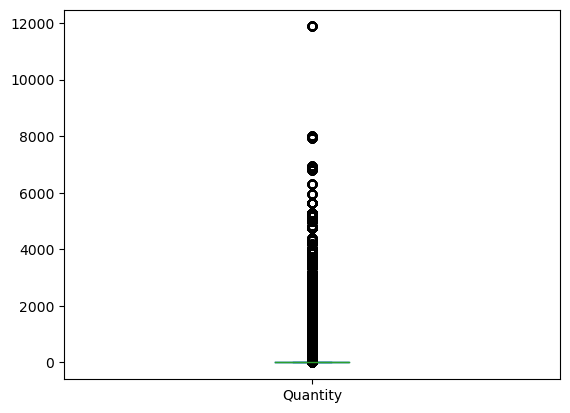

In [14]:
sales_history_df[QUANTITY].plot.box(column=QUANTITY)

<AxesSubplot:ylabel='Frequency'>

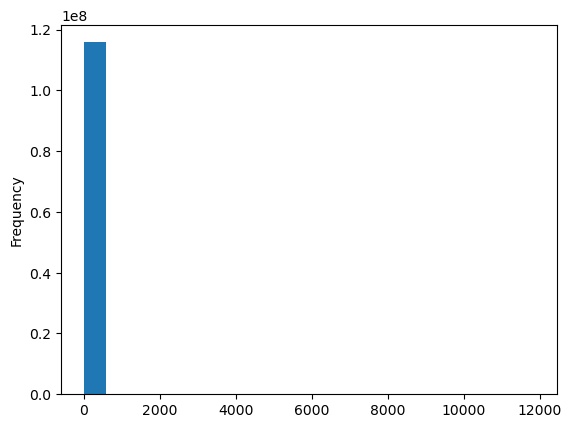

In [15]:
sales_history_df[QUANTITY].plot.hist(bins=20)

### Orders per Category

<AxesSubplot:ylabel='users'>

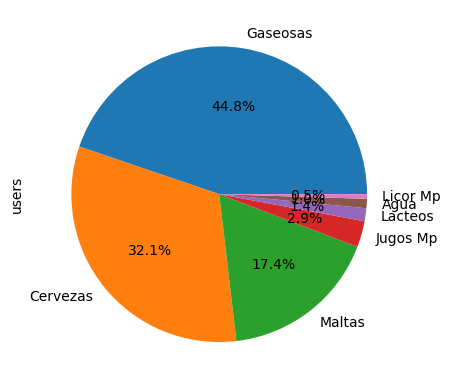

In [16]:
sales_history_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).size().sort_values(ascending=False).plot(
    kind="pie",
    ylabel="users",
    autopct="%1.1f%%")

### Quantity per Category

<AxesSubplot:xlabel='Category'>

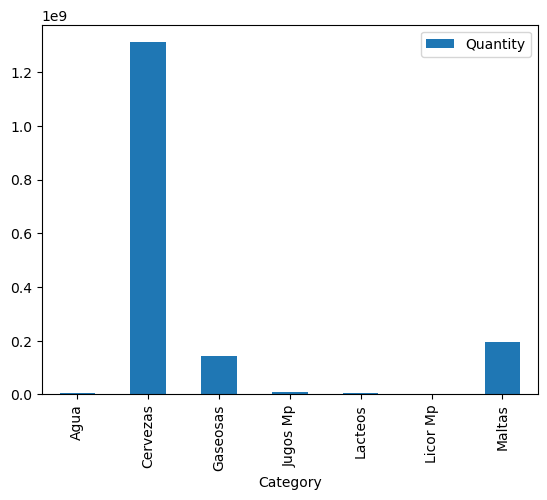

In [17]:
sales_history_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).sum().plot(kind="bar")

## Remove Duplicated Rows
There are duplicated rows. For instance the ones whose DATE == 2022-01-03 AND ACCOUNT_ID == 33237477

In [18]:
sales_history_df[(sales_history_df[DATE] == "2022-01-03") & (sales_history_df[ACCOUNT_ID] == 33237477)]

,Date,Account_id,Product_id,Category,Quantity
1,2022-01-03,33237477,15354,Maltas,5
2084,2022-01-03,33237477,15354,Maltas,5
3428,2022-01-03,33237477,15354,Maltas,5
5821,2022-01-03,33237477,15354,Maltas,5
7905,2022-01-03,33237477,15354,Maltas,5
...,...,...,...,...,...
174971,2022-01-03,33237477,15354,Maltas,5
177054,2022-01-03,33237477,15354,Maltas,5
179138,2022-01-03,33237477,15354,Maltas,5
181222,2022-01-03,33237477,15354,Maltas,5


In [19]:
cleaned_df = sales_history_df.drop_duplicates(keep="first")
cleaned_df.shape

(1323785, 5)

## Remove Rows with Quantity = 0

In [20]:
cleaned_df = cleaned_df[cleaned_df.Quantity != 0]

In [21]:
cleaned_df[sales_history_df.Quantity == 0].shape[0]

/var/folders/9w/xpg89hwn58sg8fwc10l2kj3m0000gn/T/ipykernel_13559/2939417107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[sales_history_df.Quantity == 0].shape[0]


0

In [22]:
cleaned_df.shape

(1323743, 5)

In [23]:
cleaned_df.head(50)

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21
5,2022-01-03,33536370,8206,Gaseosas,1
6,2022-01-03,33536370,8224,Gaseosas,1
7,2022-01-03,33536370,8370,Gaseosas,1
8,2022-01-03,33536370,8350,Gaseosas,1
9,2022-01-03,33236337,8326,Gaseosas,2


## Removed Outliers

Quantity    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

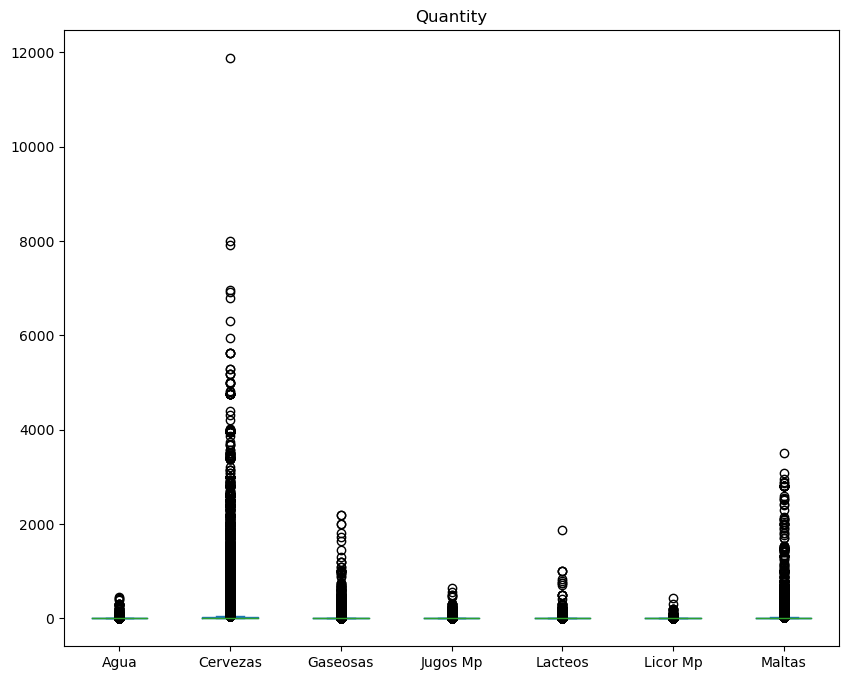

In [24]:
cleaned_df.plot.box(column=QUANTITY, by=CATEGORY, figsize=(10, 8))

In [25]:
MAX_QUANTITY = 7000
cleaned_df[cleaned_df[QUANTITY] >= MAX_QUANTITY].head()

,Date,Account_id,Product_id,Category,Quantity
29228482,2022-02-19,33851400,34426,Cervezas,7920
33486385,2022-02-25,33851400,16206,Cervezas,8000
86776879,2022-05-26,33228819,23752,Cervezas,11876


In [26]:
cleaned_df = cleaned_df[cleaned_df[QUANTITY] < MAX_QUANTITY]
cleaned_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21


Quantity    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

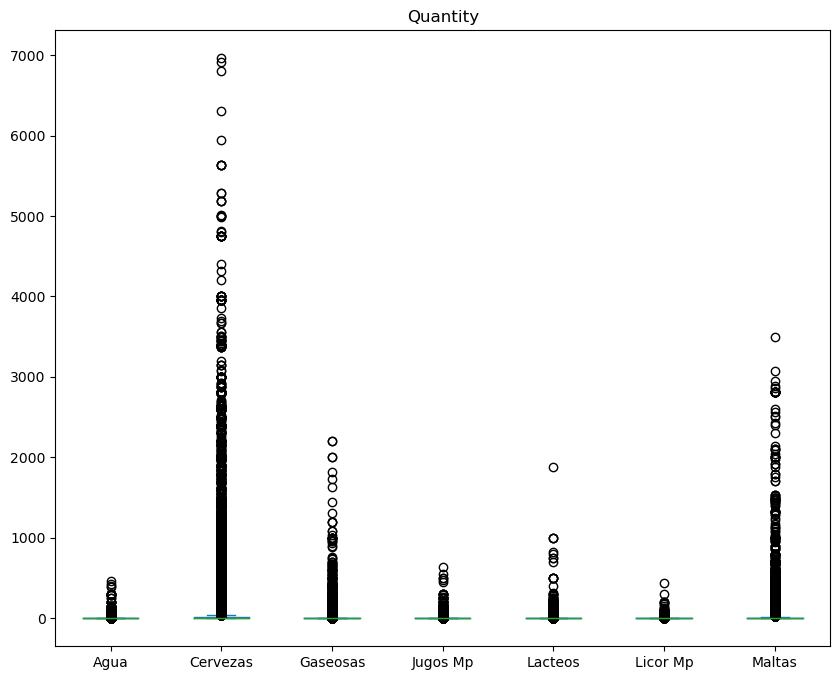

In [27]:
cleaned_df.plot.box(column=QUANTITY, by=CATEGORY, figsize=(10, 8))

## Aggregate Rows Which the Only Difference is the Quantity


In [28]:
aggregated_df = util.aggregate_df(cleaned_df, [DATE, ACCOUNT_ID, PRODUCT_ID], QUANTITY)

In [29]:
aggregated_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33217794,8320,Gaseosas,3
1,2022-01-03,33217794,8346,Gaseosas,1
2,2022-01-03,33217794,9090,Gaseosas,4
3,2022-01-03,33217995,16206,Cervezas,2
4,2022-01-03,33217995,33808,Cervezas,364


## Group Data By Orders
Let's visualize again the data.

<AxesSubplot:>

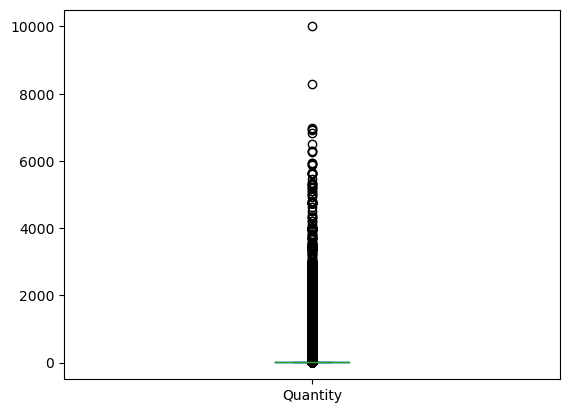

In [30]:
aggregated_df[QUANTITY].plot.box(column=QUANTITY)

<AxesSubplot:ylabel='users'>

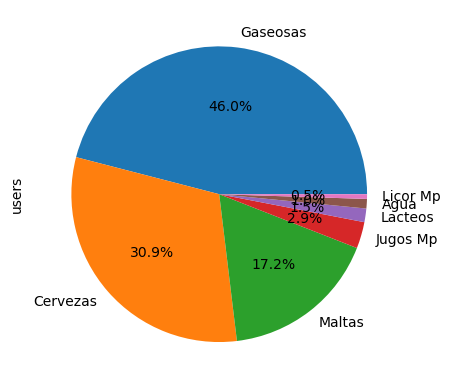

In [31]:
aggregated_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).size().sort_values(ascending=False).plot(
    kind="pie",
    ylabel="users",
    autopct="%1.1f%%")

<AxesSubplot:xlabel='Category'>

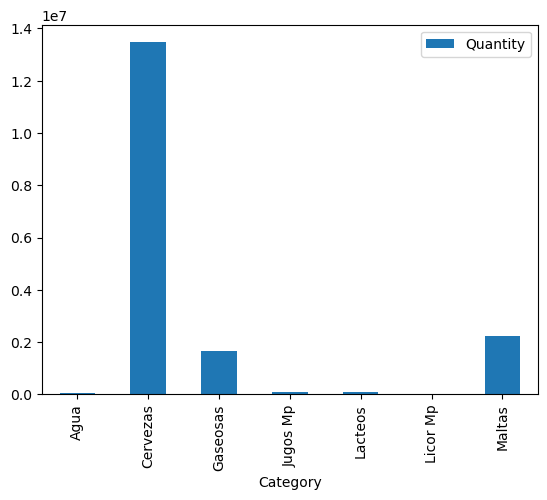

In [32]:
aggregated_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).sum().plot(kind="bar")

## Visualize Data over Time
First add more data variables.

In [33]:
ORDER_DATE = "OrderDate"
DAY_OF_WEEK = "DayOfWeek"
DAY_OF_MONTH = "DayOfMonth"
MONTH = "Month"

In [34]:
util.add_date_information(aggregated_df, DATE)

In [35]:
aggregated_df.head()

,Date,Account_id,Product_id,Category,Quantity,OrderDate,DayOfWeek,DayOfMonth,Month
0,2022-01-03,33217794,8320,Gaseosas,3,2022-01-03,0,3,1
1,2022-01-03,33217794,8346,Gaseosas,1,2022-01-03,0,3,1
2,2022-01-03,33217794,9090,Gaseosas,4,2022-01-03,0,3,1
3,2022-01-03,33217995,16206,Cervezas,2,2022-01-03,0,3,1
4,2022-01-03,33217995,33808,Cervezas,364,2022-01-03,0,3,1


## Average Sales per Week Day

In [36]:
sorted_sales_per_day_week = aggregated_df[[QUANTITY, DAY_OF_WEEK]].groupby([DAY_OF_WEEK]).mean().sort_values(
    by=[DAY_OF_WEEK],
    axis=0,
    ascending=True)

In [37]:
plotdata = pd.DataFrame(
    {QUANTITY: list(sorted_sales_per_day_week[QUANTITY])},
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<AxesSubplot:>

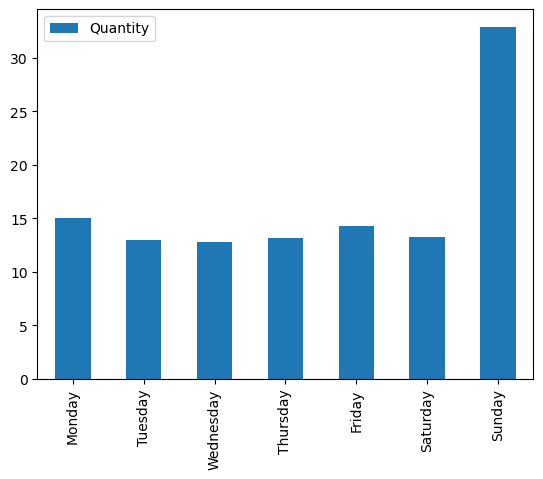

In [38]:
plotdata.plot(kind="bar")

## Average Sales per Month Day

<AxesSubplot:xlabel='DayOfMonth'>

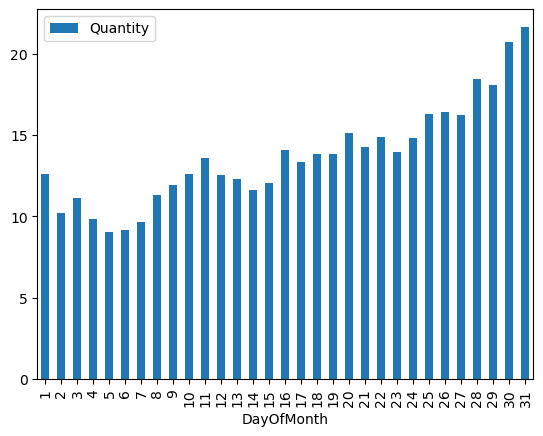

In [39]:
quantity_per_day_month_df = aggregated_df[[QUANTITY, DAY_OF_MONTH]].groupby([DAY_OF_MONTH]).mean()
quantity_per_day_month_df.sort_values(by=[DAY_OF_MONTH], axis=0, ascending=True).plot(kind="bar")